# CustomerSuccessBox

Here by starting the assignment, by forming differnt models from decision trees, Random Classsifier and going towards bagging and boosting to over come the overfitting scenario as we can see by the accuracy scores below.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


train = pd.read_csv("C:\\Users\\jzsim\\Downloads\\Train_Set.csv")
test = pd.read_csv("C:\\Users\\jzsim\\Downloads\\Test_Set.csv")
#train = train.drop_duplicates(subset='account_id', keep="last")
trainX = train.iloc[:,2:64]
trainY = train.iloc[:,64]
testX = test.iloc[:,2:64]
testY = test.iloc[:,64]

In [11]:
#decision tree
dt = DecisionTreeClassifier() #storing the classifer in dt

dt.fit(trainX,trainY) #fitting te model 

dttest=dt.score(testX,testY) #checking the score like accuracy
print(dttest)
dttrain=dt.score(trainX,trainY)
print(dttrain)
#so our model is overfitting 

0.9937879810938555
0.9955015430753404


In [22]:
#Random Forest clssifer: it is a ensemble of Decision tree 
rf = RandomForestClassifier(n_estimators=62) 
rf.fit(trainX,trainY) #fitting the random forest model 

rftest=rf.score(testX,testY) #the accuracy of the test model 
print(rftest)
rftrain=rf.score(trainX,trainY) #the accuracy of the train model 
print(rftrain)

0.9946320054017556
0.9955015430753404


In [23]:
#Bagging - Gradient 
bg = BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5,max_features=1.0, n_estimators=62)
bg.fit(trainX,trainY) #fitting the model 

bgtest=bg.score(testX,testY) #test accuracy
print(bgtest)
bgtrain=bg.score(trainX,trainY) #train accuracy 
print(bgtrain)

0.9933828494260635
0.995161543424058


In [16]:
#Ada boosting 
ada = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=10,learning_rate=1)
ada.fit(trainX,trainY)

adatest=ada.score(testX,testY)
print(adatest)
adatrain=ada.score(trainX,trainY)
print(adatrain)

0.9942606347062796
0.9955015430753404


Now building a model with Xg Boost to check the performance and Precision and recall values also comaring the original values and predicted values

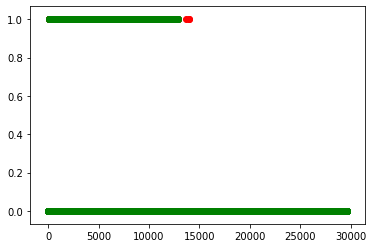

In [18]:
model = XGBClassifier()
model.fit(trainX, trainY)
pred_test = model.predict(testX)

plt.scatter(range(29620),pred_test,c='r')
plt.scatter(range(29620),testY,c='g')
plt.show()


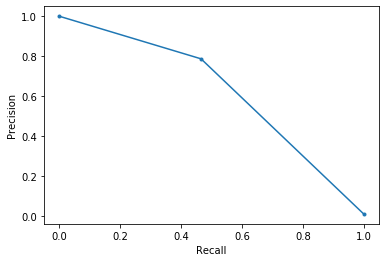

In [19]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(testY, pred_test)
plt.plot(recall, precision, marker='.', label='NN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [21]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precision = precision_score(testY, pred_test)
print(precision)
recall = recall_score(testY, pred_test)
print(recall)

0.7865853658536586
0.4657039711191336


As we can see above we got the precision values from 0.786 and recall values 0.465.
We can clearly see that the data we are using is very vast and is making an impackon the accuracy and different obtained values after the model is build.


Also we can work on the data or we work on building complex models for the same.

I'll be going to build a Neural Network model for the same.

In [24]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

train = pd.read_csv("C:\\Users\\jzsim\\Downloads\\Train_Set.csv")
test = pd.read_csv("C:\\Users\\jzsim\\Downloads\\Test_Set.csv")
#train = train.drop_duplicates(subset='account_id', keep="last")
trainX = train.iloc[:,2:64]
trainY = train.iloc[:,64]
testX = test.iloc[:,2:64]
testY = test.iloc[:,64]

In [29]:
cont_model = Sequential()
cont_model.add(Dense(500,input_dim=62,activation="relu"))
cont_model.add(Dense(256,activation="relu"))
cont_model.add(Dense(128,activation="relu"))
cont_model.add(Dense(256,activation="relu"))
cont_model.add(Dense(1,kernel_initializer="normal"))
cont_model.compile(loss="mean_squared_error",optimizer = "adam",metrics = ["accuracy"])

first_model = cont_model
first_model.fit(trainX,trainY,epochs=100,batch_size=10000)
pred_train = first_model.predict(trainX)
pred_train = pd.Series([i[0] for i in pred_train])
pred_test = first_model.predict(testX)
pred_test = pd.Series([i[0] for i in pred_test])


Epoch 1/100
114706/114706 [==============================] - 2s 17us/step - loss: 0.0487 - accuracy: 0.9847
Epoch 2/100
114706/114706 [==============================] - 2s 15us/step - loss: 0.0120 - accuracy: 0.9897
Epoch 3/100
114706/114706 [==============================] - 2s 15us/step - loss: 0.0094 - accuracy: 0.9899
Epoch 4/100
114706/114706 [==============================] - 2s 15us/step - loss: 0.0081 - accuracy: 0.9911
Epoch 5/100
114706/114706 [==============================] - 2s 15us/step - loss: 0.0077 - accuracy: 0.9921
Epoch 6/100
114706/114706 [==============================] - 2s 15us/step - loss: 0.0075 - accuracy: 0.9921
Epoch 7/100
114706/114706 [==============================] - 2s 15us/step - loss: 0.0090 - accuracy: 0.9922
Epoch 8/100
114706/114706 [==============================] - 2s 15us/step - loss: 0.0078 - accuracy: 0.9918
Epoch 9/100
114706/114706 [==============================] - 2s 15us/step - loss: 0.0070 - accuracy: 0.9923
Epoch 10/100
114706/114706 [

Now as we have got ourselves a model with 99% accuracy we now tend to see the real values vs the predicted results from our model.

Below is a graph for train data where red dots are the predicted values and green dots are the actual result.

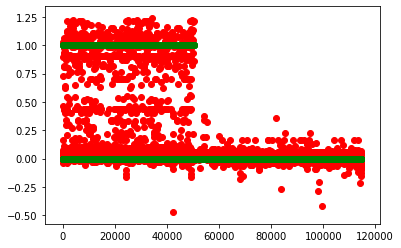

In [40]:
plt.scatter(range(114706),pred_train,c='r')
plt.scatter(range(114706),trainY,c='g')
plt.show()

Similarly Below is a graph for test data where red dots are the predicted values and green dots are the actual result.

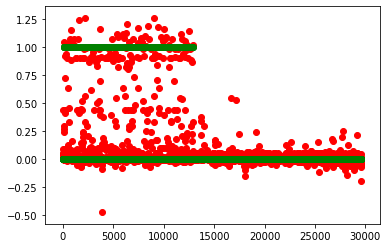

In [44]:
plt.scatter(range(29620),pred_test,c='r')
plt.scatter(range(29620),testY,c='g')
plt.show()

Now forming the precision recall curve for the train data and getting the Precision and Recall Scores too.

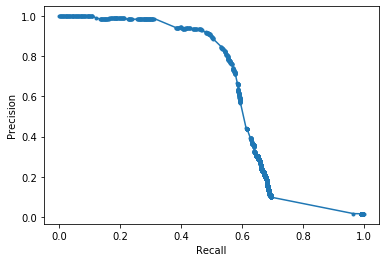

0.9461562489008686
0.7506565527520842


In [34]:
precision, recall, _ = precision_recall_curve(trainY, pred_train)
plt.plot(recall, precision, marker='.', label='NN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

precision01 = precision_score(trainY, pred_train.round(),pos_label='positive',average='macro')
print(precision111)
recall01 = recall_score(trainY, pred_train.round(),pos_label='positive',average='macro')
print(recall11)

Now forming the precision recall curve for the test data and getting the Precision and Recall Scores too.

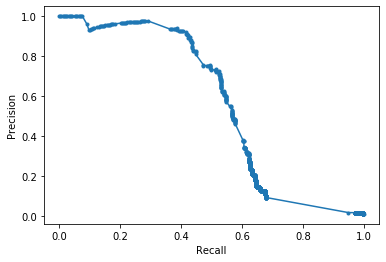

0.9095325476127594
0.7197735706804531


In [37]:
precision, recall, _ = precision_recall_curve(testY, pred_test)
plt.plot(recall, precision, marker='.', label='NN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

precision1 = precision_score(testY, pred_test.round(),pos_label='positive',average='macro')
print(precision1)
recall1 = recall_score(testY, pred_test.round(),pos_label='positive',average='macro')
print(recall1)

As we can see we are gettting a High Precison and Recall rates.

Also further attending the session2 of doubt clearing, I improved with my accuracy. Also tried to implement the model with LSTM and RNN but was not able to get satisfactry result as I was using the whole data for the same.

I found out that the data has unique values for each row when account_id and week_start_date were taken in count so I did not proceed with feature extraction process and when this data is run through K cross validation, PCA algorithm it gives 25 rows as a optimal measure to get 99.99 % accuracy, i.e. rejecting 37 features out of 62 which plays a important role in data.
As the features were unknown It was not in the right justice to discard those features.

Also I tried to select the data using unique account_id which yeilds 2690 account numbers,I trained my model using the same but this data is very less to give proper and accurate resukts to test set data when used to predict,
Hence I used the whole data set and got some pretty good results.


At last Thankyou It was a fun assignment to work on and Looking forward to hear from you !

# Happy Dabbling !!